# 4. Association Rules

Association rules are a rules-based unsupervised learning method for identifying implied associations between items in a dataset of transactions. Transactions take the form of itemsets, or collections of items. Association rules are typically used in market-basket analysis to identify associations between items bought online or in a store. Based on those rules, companies can place objects near each other on shelves or give informed recommendations to the customer to boost sales.

Consider the transactions below:

| Transaction | Items                       |
|-------------|-----------------------------|
| 1           | Avocado, Banana, Carrot     |
| 2           | Avocado, Carrot, Doughnut   |
| 3           | Banana, Carrot, Doughnut    |
| 4           | Avocado, Doughnut, Eggplant |
| 5           | Banana, Carrot, Eggplant    |

Every potential itemset has an associated _support_ within this transaction list, representing the proportion of transactions containing that itemset, or the probability of obtaining that itemset if we choose a random transaction. We can evaluate the support of an itemset $X$ using:

$$ support(X) = \frac{count(X)}{n} $$

Where $n$ is the total number of transactions, and $count(X)$ is the total number of transactions containing the itemset $X$. If we take the single itemset $X = (A)$, we get the support $s(A) = \frac{3}{5}$. The double itemset $X = (A,B)$ has support $support(X) = \frac{1}{5}$. We define _frequent itemsets_ as itemsets with a support above an arbitrary _support level_ , between 0 and 1.

Association rules between itemsets will generally take the form of $X \rightarrow Y$ where $X$ is called the LHS or _antecedant_ and $Y$ is called the RHS or _consequent_ . This implies a probable association between the antecedant and the consequent itemsets. In typical shopping basket analysis, this is interpreted as "customers who buy $X$ are likely to also buy $Y$".

## 4.1 Evaluation of Candidate Rules

Many metrics can be used to evaluate association rules, each measuring slightly different quantities. Typically we will use several statistics to quantify association rules, namely **support**, **confidence**, **lift** and **leverage**. Like itemsets, association rules $R = X \rightarrow Y$ will have a support, measuring the proportion of transactions containing the itemsets in the association rule, or the probability that a transaction drawn at random will contain the itemset $(X,Y)$.

$$support(R) = support(X,Y) = \frac{count(X,Y)}{n}$$

In the example transactions from the previous section, the support for the rule **Avocado** $\rightarrow$ **Banana** is $\frac{1}{5}$.

**Confidence** measures the proportion of transactions containing itemset $X$ that also contain itemset $Y$, or the probability that an itemset containing $X$, drawn at random, will contain $Y$.

$$confidence(R) = \frac{support(X,Y)}{support(X)} = \frac{count(X,Y)}{count(X)}$$

In the example transactions from the previous section, the confidence for the rule **Avocado** $\rightarrow$ **Banana** is $\frac{1}{3}$.

**Lift** measures how many times more often X and Y occur together than expected if they are statistically independent of each other. Lift is a measure of how X and Y are really related rather than coincidentally happening together.

$$lift(R) = \frac{support(X,Y)}{support(Y)*support(X)} = \frac{n*count(X,Y)}{count(Y)*count(X)}$$

In the example transactions from the previous section, the lift for the rule **Avocado** $\rightarrow$ **Banana** is $\frac{5}{9}$.

**Leverage** is a similar notion, but instead of using a ratio, leverage uses the difference. Leverage measures the difference in the probability of X and Y appearing together in the dataset compared to what would be expected if X and Y were statistically independent of each other.

$$leverage(R) = {support(X,Y)}-{support(Y)*support(X)}$$

In the example transactions from the previous section, the leverage for the rule **Avocado** $\rightarrow$ **Banana** is $\frac{1}{5} - \frac{3}{5}*\frac{3}{5} = \frac{-4}{25}$.

Ideally, we'd like a support and confidence that approach 1, a lift greater than 1 or a leverage greater than 0.

## 4.2 Apriori Algorithm

For large datasets, calculating the support, confidence and lift of each possible association rule is prohibitively computationally expensive because of the exponential nature of itemset combinations. Instead, we can notice that any itemset $(A)$ always has support greater than or equal to a superset $(A,B)$, for the simple reason that there cannot be more items containing $A,B$ than containing $A$. So if we start by calculating the support of single items, we can determine what supersets of those items will not meet our _support level_ and save computation time.

The Apriori algorithm works as follows:

    1. Calculate the support for each item
    2. Prune the items that don't reach our support level
    3. Create double itemsets from remaining items
    4. Calculate the support for each double itemset
    5. Prune the double itemsets that don't reach our support level
    6. Create triple itemsets from remaining items
    ... Repeat until no itemsets pass the support threshold or we run out of combinations
    n. Create possible rules
    
We can construct potential rules from the frequent itemsets and compute their associated confidence, lift and leverage. We can then use those metrics to find the most significant rules.

## 4.3 Apriori Example

Let's try to construct some association rules using the apriori algorithm in R. We will do this using the `arules` library and its inbuilt `apriori()` function. We can install the libraries by typing `install.packages('arules')`. We will also use the associated `arulesViz()` library which provides tools to visualise association rules. We can install it by typing `install.packages('arulesViz')`.

In [1]:
library(arules)
library(arulesViz) ;

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write

Loading required package: grid
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


We’re going to use movielens_top40 data, which tracks user ratings of top 40 movies, to see if we can use the apriori algorithm to identify associations between movies.

In [2]:
df <- read.csv("movielens_top40.csv")

head(df)

,user_1,user_6,user_7,user_15,user_17,user_18,user_19,user_21,user_28,user_39,⋯,user_596,user_597,user_599,user_600,user_602,user_603,user_606,user_607,user_608,user_610
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
Aladdin (1992),NA,5,3.0,3,NA,3.5,3,4.0,NA,4,⋯,NA,4,3.0,3.5,NA,NA,NA,NA,3,NA
American Beauty (1999),5,NA,4.0,4,4.0,NA,4,2.0,4.0,5,⋯,NA,5,5.0,4.5,NA,5,4.5,3,5,3.5
Apollo 13 (1995),NA,4,4.5,NA,3.5,NA,NA,NA,NA,NA,⋯,3.5,NA,2.5,2.0,4,NA,NA,5,2,NA
Back to the Future (1985),5,NA,5.0,5,4.5,4.0,4,5.0,NA,4,⋯,4.0,5,3.5,4.5,NA,2,3.5,3,2,5.0
Batman (1989),4,3,3.0,NA,4.5,NA,5,3.5,2.5,4,⋯,3.5,4,3.5,2.5,4,2,3.5,3,3,4.5
Braveheart (1995),4,5,NA,NA,4.5,4.5,NA,NA,3.5,NA,⋯,NA,5,3.5,2.0,5,1,3.5,5,4,4.5


### 4.3.1 Data Preparation

Inspecting the data we can see a lot of NA’s. These correspond to movies that haven't been reviewed. In order to find associations between movies we will need to convert this to a sparse binary matrix, in which each user represents a transaction, and each positive review is an item in the corresponding basket.

First, we will need to deal with the null values, or missing reviews. If we remove null values, we end up with no rows:

In [3]:
a.df <- na.omit(df)

dim(a.df)

[1]   0 153

So instead, we set all null values to zero. This is basically like saying if a movie is not reviewed its the same as a zero rating. This isn’t perfect, but it allows us to deal with an otherwise unmanageable dataset.

We use the `is.na()` function, which returns logical values, `TRUE` if the input is `NA`, and `FALSE` otherwise. When given a dataframe, it returns a matrix of `TRUE`s and `FALSE`s depending on the values in the input data. We can use this as an index for our dataframe to reference only `NA` cells and set their value to 0. First we copy the data to a variable `a.df` to preserve the original dataframe `df`.

In [4]:
a.df <- df
a.df[is.na(a.df)] <- 0

head(a.df)

,user_1,user_6,user_7,user_15,user_17,user_18,user_19,user_21,user_28,user_39,⋯,user_596,user_597,user_599,user_600,user_602,user_603,user_606,user_607,user_608,user_610
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aladdin (1992),0,5,3.0,3,0.0,3.5,3,4.0,0.0,4,⋯,0.0,4,3.0,3.5,0,0,0.0,0,3,0.0
American Beauty (1999),5,0,4.0,4,4.0,0.0,4,2.0,4.0,5,⋯,0.0,5,5.0,4.5,0,5,4.5,3,5,3.5
Apollo 13 (1995),0,4,4.5,0,3.5,0.0,0,0.0,0.0,0,⋯,3.5,0,2.5,2.0,4,0,0.0,5,2,0.0
Back to the Future (1985),5,0,5.0,5,4.5,4.0,4,5.0,0.0,4,⋯,4.0,5,3.5,4.5,0,2,3.5,3,2,5.0
Batman (1989),4,3,3.0,0,4.5,0.0,5,3.5,2.5,4,⋯,3.5,4,3.5,2.5,4,2,3.5,3,3,4.5
Braveheart (1995),4,5,0.0,0,4.5,4.5,0,0.0,3.5,0,⋯,0.0,5,3.5,2.0,5,1,3.5,5,4,4.5


Now we need to convert our dataframe to a sparse matrix of ones and zeros, so we say any rating above 3.5 is a positive review, and thus item in our itemset. We then need to transpose the data so that our items (movies) are in the columns and our transactions (users) are in the rows.

In [5]:
# Replace ratings over 3.5 with ones and everything else with 0
a.df[a.df < 3.5] <- 0
a.df[a.df != 0] <- 1

# Transpose
a.df <- t(a.df)
head(a.df)

,Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),Fargo (1996),Fight Club (1999),Forrest Gump (1994),⋯,"Sixth Sense, The (1999)",Speed (1994),Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
user_1,0,1,0,1,1,1,1,1,1,1,⋯,0,0,1,1,1,0,1,0,0,1
user_6,1,0,1,0,0,1,1,0,0,1,⋯,0,1,0,0,0,0,0,1,1,0
user_7,0,1,1,1,0,0,0,0,0,1,⋯,1,0,1,1,1,0,1,0,0,1
user_15,0,1,0,1,0,0,0,0,0,1,⋯,0,0,1,1,1,1,0,0,0,0
user_17,0,1,1,1,1,1,1,0,1,1,⋯,1,0,1,1,1,1,1,0,0,1
user_18,1,0,0,1,0,1,1,1,1,1,⋯,1,0,1,1,1,1,1,0,1,1


Now the dataset is in a form that can be coerced into a transactions object. These are the types of objects that the apriori algorithm will accept as input. We can convert the binary matrix to a `transactions` object using the `as()` function.

In [6]:
transaction_data <- as(a.df, 'transactions')

head(transaction_data)

transactions in sparse format with
 6 transactions (rows) and
 40 items (columns)

Fortunately we don't actually have to do this step because the `apriori()` implementation in `arules` does this automatically. Let's run the algorithm.

In [7]:
rules <- apriori(a.df, parameter = list(supp = 0.5, conf = 0.9, target = "rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 76 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[40 item(s), 153 transaction(s)] done [0.00s].
sorting and recoding items ... [28 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [26 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Let's inspect the results and order them by `lift`.

In [8]:
inspect(head(rules, 10, by = "lift"))

     lhs                                                                                 rhs                                                           support confidence     lift count
[1]  {Lord of the Rings: The Two Towers, The (2002)}                                  => {Lord of the Rings: The Return of the King, The (2003)}     0.5228758  0.9523810 1.674877    80
[2]  {Lord of the Rings: The Return of the King, The (2003)}                          => {Lord of the Rings: The Two Towers, The (2002)}             0.5228758  0.9195402 1.674877    80
[3]  {Lord of the Rings: The Two Towers, The (2002)}                                  => {Lord of the Rings: The Fellowship of the Ring, The (2001)} 0.5032680  0.9166667 1.575843    77
[4]  {Lord of the Rings: The Return of the King, The (2003)}                          => {Lord of the Rings: The Fellowship of the Ring, The (2001)} 0.5163399  0.9080460 1.561023    79
[5]  {Forrest Gump (1994),                                                 

Now we can get the first 5 rules, ordered by lift, and plot a graph of those rules using the `plot()` function and specifying `method="graph"`.

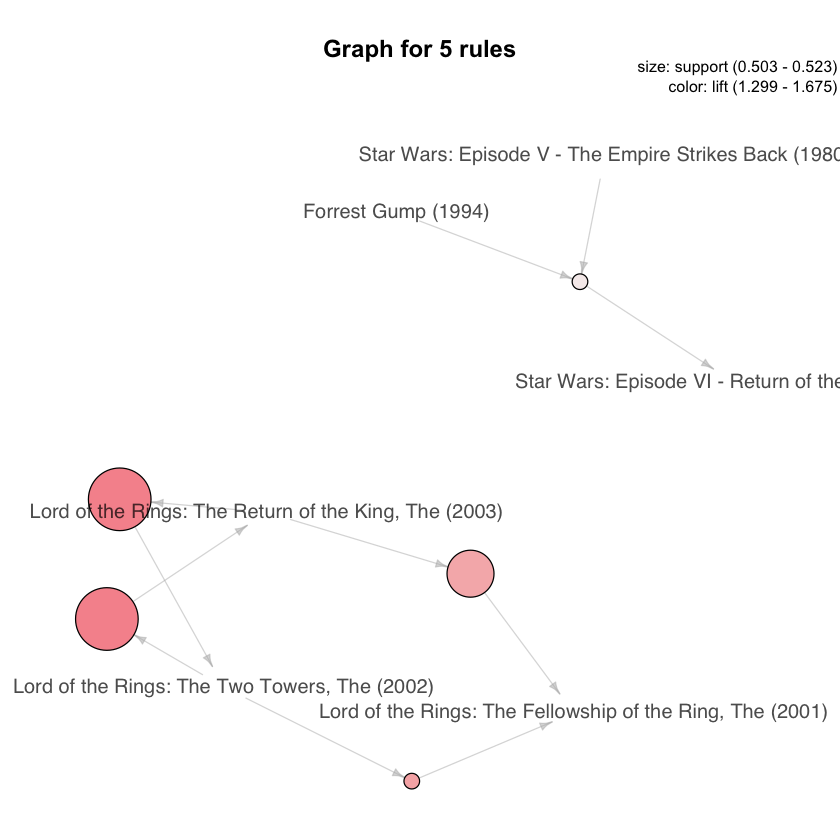

In [9]:
highLiftRules <- head(sort(rules, by="lift"), 5)
plot(highLiftRules, method="graph")

We've successfully identified associations between the Star Wars movies and the Lord of the Rings movies.